# Practical - 3 & 8:Perform MNIST dataset classification using shallow neural networks (feedforward network with backpropagation algorithm) and implementing RNN 



# Using Perceptron Model (Only input layer and Output Layer)

In [5]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [7]:
len(X_train)


60000

In [8]:
len(X_test)


10000

In [9]:
X_train[0].shape


(28, 28)

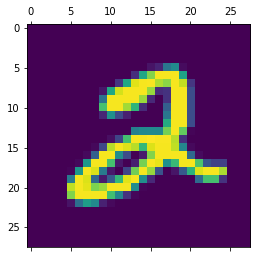

In [10]:
plt.matshow(X_train[5])


In [11]:
y_train[5]


2

In [12]:
X_train = X_train / 255
X_test = X_test / 255


In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4709 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9258


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2671 - accuracy: 0.9258


[0.2671399414539337, 0.9258000254631042]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.9006481e-02, 8.0233855e-07, 6.5605551e-02, 9.6276522e-01,
       3.3125579e-03, 1.7150113e-01, 1.3820583e-06, 9.9988979e-01,
       1.3679940e-01, 7.4234557e-01], dtype=float32)

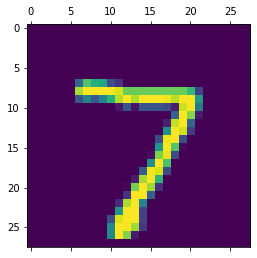

In [18]:
plt.matshow(X_test[0])

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    1,    0,    5,    3,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   10,  927,   11,    8,    5,   11,   12,   36,    5],
       [   3,    0,   26,  909,    0,   29,    2,   12,   21,    8],
       [   2,    2,    7,    0,  916,    0,    5,    4,    6,   40],
       [  11,    3,    6,   22,   10,  789,   11,    4,   29,    7],
       [  14,    3,   11,    1,    8,   12,  905,    2,    2,    0],
       [   1,    8,   22,    5,    8,    0,    0,  945,    1,   38],
       [  10,   14,    8,   16,    9,   31,    8,   12,  856,   10],
       [  11,    7,    1,    8,   23,    8,    0,   19,    4,  928]])>

Text(69.0, 0.5, 'Truth')

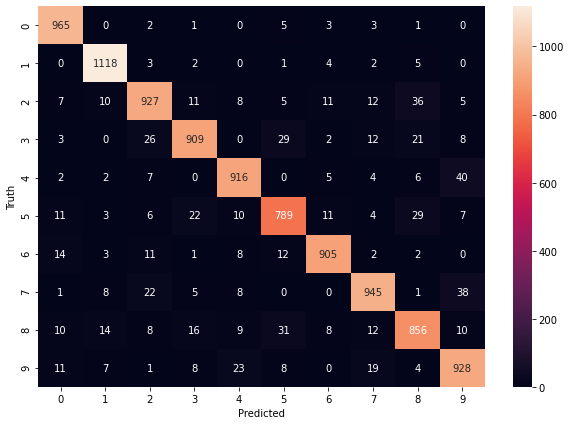

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Shallow networks using 1 hidden layer (CNN)


In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2701 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1236 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0852 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9806: 0s - loss: 0.0
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0510 - accuracy: 0.9843


In [23]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9763


[0.07669694721698761, 0.9763000011444092]

Text(69.0, 0.5, 'Truth')

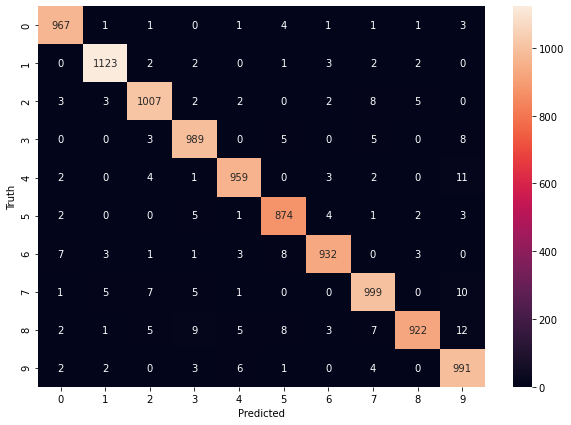

In [24]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using RNN

In [43]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow.keras.layers as KL
## Model
inputs = KL.Input(shape=(28, 28))
# For RNN
# x = KL.RNN(64, activation ='relu')(inputs) 

# For LSTM
# x = KL.LSTM(64)(inputs)

x = KL.LSTM(64)(inputs)
outputs = KL.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["acc"])
model.fit(X_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

NotImplementedError: Cannot convert a symbolic Tensor (lstm_12/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [33]:
tf.__version__

'2.5.0'

In [ ]:
model.evaluate(X_test,y_test)


In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

# Using ANN - 2 hidden layers

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer

batch_size = 128
hidden_units = 256
dropout = 0.45
num_labels=len(np.unique(y_train))
model = keras.Sequential([
    keras.layers.Dense(hidden_units, input_dim=784,activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(hidden_units,activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(num_labels,activation='softmax')])
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)
data=X_train_flattened.shape


In [ ]:
test_loss, test_acc = model.evaluate(X_test_flattened, y_test)

In [ ]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')